In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print (iris.data.shape)

(150, 4)


In [13]:
type(iris.data)

numpy.ndarray

In [14]:
data = iris.data
feature_names = iris.feature_names

In [15]:
df = pd.DataFrame(data, columns=feature_names)

In [16]:
summary_stats = df.describe()
print(summary_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [17]:
subset_df = df.head(50)


In [18]:
extreme_sepal_length = (df['sepal length (cm)'] < 4) | (df['sepal length (cm)'] > 8)
print("Are there any extreme sepal length values? ", extreme_sepal_length.any())

Are there any extreme sepal length values?  False


In [20]:
def find_extreme_values(feature):
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    extreme_values = (df[feature] < df[feature].quantile(0.05)) | (df[feature] > df[feature].quantile(0.95))
    return extreme_values.any()
sepal_width_extreme = find_extreme_values('sepal width (cm)')
petal_length_extreme = find_extreme_values('petal length (cm)')
petal_width_extreme = find_extreme_values('petal width (cm)')


In [21]:
print(petal_length_extreme)


True


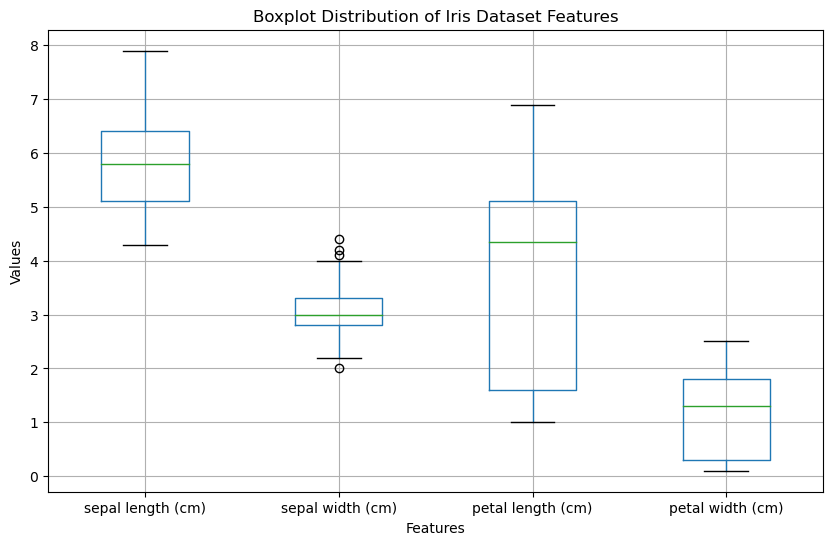

In [22]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot Distribution of Iris Dataset Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.savefig("boxplot.png")
plt.show()

In [23]:
df.to_csv("iris_data.csv", index=False)